<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> IMPORT NECESSARY LIBRARIES </span></div>

In [1]:
import numpy as np
# import shap
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re
import statistics as st
import seaborn as sns
from datetime import datetime
from tqdm import tqdm

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> IMPORT MACHINE LEARNING LIBRARIES </span></div>

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
# from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from IPython.display import display, HTML

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> HEADLINE KEY-WORD FUNCTION </span></div>

In [3]:
def split_headlines(df):

    patterns = ['buy_now', 'shop_now', 'limited_offer', 'add_cart', 
                'use_code', 'free_shipping', 'today_only', 'free_delivery', 
                'extra_discount', 'voucher_code', 'last_chance', 'up_to', 
                '%_off']

    for i in patterns:
        pattern_split = i.split('_')    
        pattern = re.compile(rf"\b{pattern_split[0]}.*\b{pattern_split[1]}", 
                             re.I)
        df[i] = df.apply(lambda x: 1 if pattern.search(x.headline) else 0, 
                         axis=1)
        
    return df

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> READ FB CSV FILE </span></div>

In [4]:
df = pd.read_csv('df_with_labels.csv')
df = df.drop(df.columns[0], axis=1)

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> CHECK FIRST 5 ROWS OF DATA </span></div>

In [5]:
df.head()

,date,country,brand_name,channel,profile_name,campaign_name,ad_set_name,ad_name,headline,cost,...,use_code,free_shipping,today_only,free_delivery,extra_discount,voucher_code,last_chance,up_to,%_off,cluster
0,2019-11-24,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,24.180000,...,0,0,0,0,0,0,0,0,0,0
1,2019-11-25,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.700001,...,0,0,0,0,0,0,0,0,0,0
2,2019-11-26,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,23.910000,...,0,0,0,0,0,0,0,0,0,0
3,2019-11-24,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,18.559999,...,0,0,0,0,0,0,0,0,0,0
4,2019-11-25,PH,Enfa,Lazada,PH - Enfa - Facebook,MEAD-ECOMMERCE-2019-13 - Enfa Always On Q4,AO Q4 - Prospecting CV,AO Q4 - Enfa - Milk Guarantee,Buy Enfagrow A+ Four at Lazada Now!,21.250000,...,0,0,0,0,0,0,0,0,0,0


<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> GET KEY-WORD HEADLINES FEATURES </span></div>

In [6]:
df = split_headlines(df)

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> ADD DATE FEATURES </span></div>

In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [8]:
df['months'] = df.date.dt.month
df['day_name'] = df.date.dt.day_name()
day_name = df.date.dt.day_name()
df['is_weekend'] = day_name.apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">FILTER FEATURES FOR MODEL </span></div>

In [9]:
df_model = df[['brand_name', 'channel', 'cost', 'buy_now', 'shop_now', 'limited_offer', 'add_cart', 'use_code', 'free_shipping', 'today_only',
             'free_delivery', 'extra_discount', 'voucher_code', 'last_chance', 'up_to', '%_off', 'months', 'day_name', 'is_weekend'] + ['clicks']]
df_model

,brand_name,channel,cost,buy_now,shop_now,limited_offer,add_cart,use_code,free_shipping,today_only,free_delivery,extra_discount,voucher_code,last_chance,up_to,%_off,months,day_name,is_weekend,clicks
0,Enfa,Lazada,24.180000,1,0,0,0,0,0,0,0,0,0,0,0,0,11,Sunday,1,405
1,Enfa,Lazada,23.700001,1,0,0,0,0,0,0,0,0,0,0,0,0,11,Monday,0,326
2,Enfa,Lazada,23.910000,1,0,0,0,0,0,0,0,0,0,0,0,0,11,Tuesday,0,360
3,Enfa,Lazada,18.559999,1,0,0,0,0,0,0,0,0,0,0,0,0,11,Sunday,1,198
4,Enfa,Lazada,21.250000,1,0,0,0,0,0,0,0,0,0,0,0,0,11,Monday,0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11206,Sustagen,Shopee,15.890000,1,0,0,0,0,0,0,0,0,0,0,1,1,12,Monday,0,60
11207,Sustagen,Shopee,8.910000,1,0,0,0,0,0,0,0,0,0,0,1,1,12,Monday,0,89
11208,Sustagen,Shopee,0.280000,1,0,0,0,0,0,0,0,0,0,0,1,1,12,Monday,0,5
11209,Sustagen,Shopee,7.990000,1,0,0,0,0,0,0,0,0,0,0,1,1,12,Monday,0,27


<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> ONE-HOT ENCODE </span></div>

In [10]:
df_model_dummies = pd.get_dummies(df_model, columns=['brand_name', 'channel', 'day_name', 'months',
                                                    'buy_now', 'shop_now', 'limited_offer', 'add_cart', 'use_code', 
                                                     'free_shipping', 'today_only', 'free_delivery', 'extra_discount', 
                                                     'voucher_code', 'last_chance', 'up_to', '%_off'])
df_model_dummies

,cost,is_weekend,clicks,brand_name_Enfa,brand_name_Lactum,brand_name_Sustagen,channel_Lazada,channel_Shopee,day_name_Friday,day_name_Monday,...,extra_discount_0,extra_discount_1,voucher_code_0,voucher_code_1,last_chance_0,last_chance_1,up_to_0,up_to_1,%_off_0,%_off_1
0,24.180000,1,405,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,23.700001,0,326,1,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
2,23.910000,0,360,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,18.559999,1,198,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,21.250000,0,178,1,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11206,15.890000,0,60,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1
11207,8.910000,0,89,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1
11208,0.280000,0,5,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1
11209,7.990000,0,27,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1


<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> SET TARGET FEATURE </span></div>

In [11]:
df_target = df_model_dummies['clicks']
df_target

0        405
1        326
2        360
3        198
4        178
        ... 
11206     60
11207     89
11208      5
11209     27
11210     22
Name: clicks, Length: 11211, dtype: int64

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> SEPARATE FEATURES/TARGET </span></div>

In [12]:
df_features = df_model_dummies.drop(['clicks'], axis=1)
df_features

,cost,is_weekend,brand_name_Enfa,brand_name_Lactum,brand_name_Sustagen,channel_Lazada,channel_Shopee,day_name_Friday,day_name_Monday,day_name_Saturday,...,extra_discount_0,extra_discount_1,voucher_code_0,voucher_code_1,last_chance_0,last_chance_1,up_to_0,up_to_1,%_off_0,%_off_1
0,24.180000,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,23.700001,0,1,0,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,23.910000,0,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,18.559999,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,21.250000,0,1,0,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11206,15.890000,0,0,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,1
11207,8.910000,0,0,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,1
11208,0.280000,0,0,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,1
11209,7.990000,0,0,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,1


<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> CREATE TRAIN-TEST SPLIT </span></div>

In [13]:
X_train_0_1, X_test_0_1, y_train_0_1, y_test_0_1 = train_test_split(df_features, df_target)

In [14]:
X_train_1, X_val_0_1, y_train_1, y_val_0_1 = train_test_split(X_train_0_1, y_train_0_1)

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> TRAIN REGRESSION MODELS</span></div>

In [15]:
LR = LinearRegression()
LR.fit(X_train_1, y_train_1)

Lasso1 = Lasso()
Lasso1.fit(X_train_1, y_train_1)

Ridge1 = Ridge()
Ridge1.fit(X_train_1, y_train_1)

kNN = KNeighborsRegressor() 
kNN.fit(X_train_1, y_train_1)

DT = DecisionTreeRegressor() 
DT.fit(X_train_1, y_train_1)

RF = RandomForestRegressor() 
RF.fit(X_train_1, y_train_1)

GBM = GradientBoostingRegressor() 
GBM.fit(X_train_1, y_train_1)

SVR1 = SVR(C=1.0, epsilon=0.2)
SVR1.fit(X_train_1, y_train_1)

LGBM = LGBMRegressor()
LGBM.fit(X_train_1, y_train_1)

XGB = XGBRegressor()
XGB.fit(X_train_1, y_train_1)


# y_test_LR = LR.predict(X_test)
# y_test_Lasso = Lasso.predict(X_test)
# y_test_Ridge = Ridge1.predict(X_test)
# y_test_kNN = kNN.predict(X_test)
# y_test_DT = DT.predict(X_test)
# y_test_RF = RF.predict(X_test)
# y_test_GBM = GBM.predict(X_test)


cols = ['Regression Method','MAE train', 'MAE test']
df_0_1 = pd.DataFrame(columns=cols)


df_0_1.loc[0] = ['Linear Regression', mean_squared_error(y_train_1, LR.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, LR.predict(X_val_0_1), squared=False)]

df_0_1.loc[1] = ['Linear Regression + Lasso', mean_squared_error(y_train_1, Lasso1.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, Lasso1.predict(X_val_0_1), squared=False)]

df_0_1.loc[2] = ['Linear Regression + Ridge', mean_squared_error(y_train_1, Ridge1.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, Ridge1.predict(X_val_0_1), squared=False)]

df_0_1.loc[3] = ['kNN', mean_squared_error(y_train_1, kNN.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, kNN.predict(X_val_0_1), squared=False)]

df_0_1.loc[4] = ['Decision Tree', mean_squared_error(y_train_1, DT.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, DT.predict(X_val_0_1), squared=False)]

df_0_1.loc[5] = ['Random Forest', mean_squared_error(y_train_1, RF.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, RF.predict(X_val_0_1), squared=False)]

df_0_1.loc[6] = ['Gradient Boosting Method', mean_squared_error(y_train_1, GBM.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, GBM.predict(X_val_0_1), squared=False)]

df_0_1.loc[7] = ['Support Vector Machine', mean_squared_error(y_train_1, SVR1.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, SVR1.predict(X_val_0_1), squared=False)]

df_0_1.loc[8] = ['Light GBM', mean_squared_error(y_train_1, LGBM.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, LGBM.predict(X_val_0_1), squared=False)]

df_0_1.loc[9] = ['XGB', mean_squared_error(y_train_1, XGB.predict(X_train_1), squared=False),
                                      mean_squared_error(y_val_0_1, XGB.predict(X_val_0_1), squared=False)]

df_0_1

C:\Users\Jelo\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Jelo\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Regression Method,MAE train,MAE test
0,Linear Regression,762.011620,690.608140
1,Linear Regression + Lasso,762.654617,690.526925
2,Linear Regression + Ridge,762.012398,690.525436
3,kNN,611.977498,678.040764
4,Decision Tree,0.185860,644.393716
5,Random Forest,190.790294,452.936630
6,Gradient Boosting Method,366.240792,483.875622
7,Support Vector Machine,1223.268686,1126.933636
8,Light GBM,387.203702,450.383637
9,XGB,126.803101,446.279187


<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> GRIDSEARCH/HYPERPARAMETER TUNING </span></div>

In [51]:
est = GradientBoostingRegressor()
param_grids = {'learning_rate': [.2, 0.1, 0.05, 0.02, 0.01],
              'max_depth': [3, 4, 6, 10, 14],
              'min_samples_leaf': [2, 3, 4],
              'max_features': [.5, .3, .2] 
}   
gs_cv = GridSearchCV(est, param_grids, cv=10, scoring='neg_mean_absolute_error').fit(X_train_1, y_train_1)
print(gs_cv.best_params_)

{'learning_rate': 0.05, 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 4}


<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> TRAINED FINAL MODEL </span></div>

In [53]:
GBM = GradientBoostingRegressor(learning_rate = 0.05, max_depth=10, max_features=0.5, min_samples_leaf=4) 
clicks_gbm_model = GBM.fit(X_train_1,y_train_1)
clicks_gbm_model

GradientBoostingRegressor(learning_rate=0.05, max_depth=10, max_features=0.5,
                          min_samples_leaf=4)

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> FINAL MAE (GBM) </span></div>

In [55]:
cols = ['Regression Method','MAE Train', 'MAE Validation', 'MAE Test']
df_0_2 = pd.DataFrame(columns=cols)

df_0_2.loc[0] = ['GBM', mean_squared_error(y_train_1, clicks_gbm_model.predict(X_train_1), squared=False),
                              mean_squared_error(y_val_0_1, clicks_gbm_model.predict(X_val_0_1), squared=False),
                              mean_squared_error(y_test_0_1, clicks_gbm_model.predict(X_test_0_1), squared=False)]
df_0_2

,Regression Method,MAE Train,MAE Validation,MAE Test
0,GBM,174.981733,506.023448,505.232716


In [56]:
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

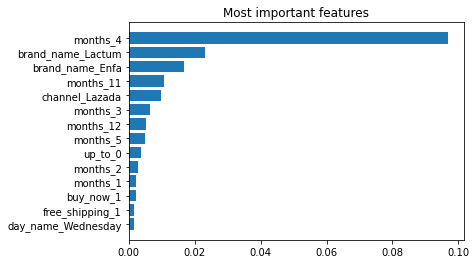

[(0.09671941973512248, 'months_4'),
 (0.023144383921384334, 'brand_name_Lactum'),
 (0.016775038424055484, 'brand_name_Enfa'),
 (0.010634736363627627, 'months_11'),
 (0.009732142746133036, 'channel_Lazada'),
 (0.006466066697012541, 'months_3'),
 (0.005205651630315506, 'months_12'),
 (0.005072177225697806, 'months_5'),
 (0.003729615790819165, 'up_to_0'),
 (0.002722197821743292, 'months_2'),
 (0.0021135241516939307, 'months_1'),
 (0.0020860735086728095, 'buy_now_1'),
 (0.0016209557141766177, 'free_shipping_1'),
 (0.0016018004817152395, 'day_name_Wednesday')]

In [19]:
impt = GBM.feature_importances_
cols_impt = X_train_0_1.columns.tolist()

feat_impt = []
for x, i in zip(impt, cols_impt):
    feat_impt.append((x, i))
sort_impt = sorted(feat_impt, key=lambda x: x[0])[-15:-1]

plt.barh([val[1] for val in sort_impt], [val[0] for val in sort_impt],
         align='center')
plt.title('Most important features')
plt.show();
sort_impt[::-1]

In [58]:
shap_values_gbm

NameError: name 'shap_values_gbm' is not defined

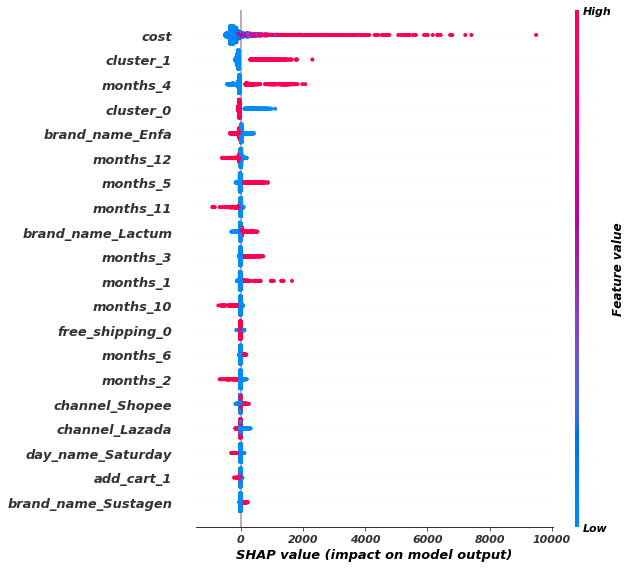

In [39]:
shap_values_gbm = shap.TreeExplainer(GBM).shap_values(X_train_0_1)
shap.summary_plot(shap_values_gbm[1:], X_train_0_1[1:])

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> GRIDSEARCH/HYPERPARAMETER TUNING (LGBM) </span></div>

In [16]:
lgbm_tune = LGBMRegressor()
param_grids_lgbm = {'learning_rate': [.2, 0.1, 0.05, 0.02, 0.01],
              'max_depth': [3, 4, 6, 10, 14],
              'num_leaves': [2, 3, 4],
              'n_estimators': [100, 250, 500, 1000] 
}   
gs_cv = GridSearchCV(lgbm_tune, param_grids_lgbm, cv=10, scoring='neg_mean_absolute_error').fit(X_train_0_1, y_train_0_1)
print(gs_cv.best_params_)

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 1000, 'num_leaves': 4}


<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> TRAIN FINAL MODEL (LGBM) </span></div>

In [17]:
LGBM = LGBMRegressor(learning_rate = 0.2, max_depth=3, num_leaves=4, n_estimators=1000) 
clicks_lgbm_model_cluster = LGBM.fit(X_train_0_1,y_train_0_1)
clicks_lgbm_model_cluster

LGBMRegressor(learning_rate=0.2, max_depth=3, n_estimators=1000, num_leaves=4)

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> FINAL MODEL TEST/TRAIN ACCURACY (LGBM) </span></div>

In [18]:
cols = ['Regression Method','MAE Train', 'MAE Validation', 'MAE Test']
df_0_2 = pd.DataFrame(columns=cols)

df_0_2.loc[0] = ['GBM', mean_squared_error(y_train_1, clicks_lgbm_model_cluster.predict(X_train_1), squared=False),
                              mean_squared_error(y_val_0_1, clicks_lgbm_model_cluster.predict(X_val_0_1), squared=False),
                              mean_squared_error(y_test_0_1, clicks_lgbm_model_cluster.predict(X_test_0_1), squared=False)]
df_0_2

,Regression Method,MAE Train,MAE Validation,MAE Test
0,GBM,349.251385,310.970448,445.458109


<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> FEATURE IMPORTANCE (LGBM) </span></div>

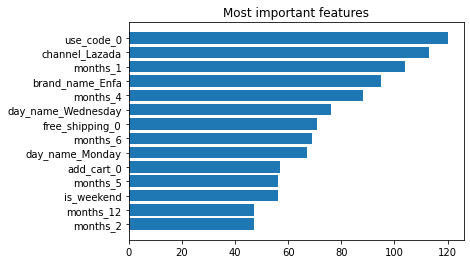

[(120, 'use_code_0'),
 (113, 'channel_Lazada'),
 (104, 'months_1'),
 (95, 'brand_name_Enfa'),
 (88, 'months_4'),
 (76, 'day_name_Wednesday'),
 (71, 'free_shipping_0'),
 (69, 'months_6'),
 (67, 'day_name_Monday'),
 (57, 'add_cart_0'),
 (56, 'months_5'),
 (56, 'is_weekend'),
 (47, 'months_12'),
 (47, 'months_2')]

In [20]:
impt = LGBM.feature_importances_
cols_impt = X_train_0_1.columns.tolist()

feat_impt = []
for x, i in zip(impt, cols_impt):
    feat_impt.append((x, i))
sort_impt = sorted(feat_impt, key=lambda x: x[0])[-15:-1]

plt.barh([val[1] for val in sort_impt], [val[0] for val in sort_impt],
         align='center')
plt.title('Most important features')
plt.show();
sort_impt[::-1]

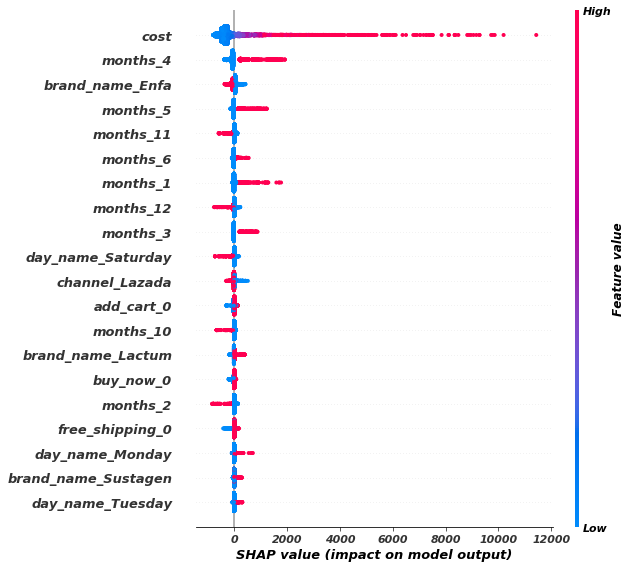

In [35]:
shap_values_lgb = shap.TreeExplainer(LGBM).shap_values(X_train_0_1)
shap.summary_plot(shap_values_lgb, X_train_0_1)

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> SAVE FINAL MODEL </span></div>

In [34]:
joblib.dump(clicks_gbm_model_cluster, "clicks_gbm_model_cluster.pkl")
joblib.dump(clicks_lgbm_model_cluster, "clicks_lgbm_model_cluster.pkl")

['clicks_lgbm_model_cluster.pkl']